In [1]:
# Recurrent Neural Network

In [2]:
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# Fix random seed
np.random.seed(5)

In [4]:
# 1. Define dataset

# Code
codes = [
    'c4', 'd4', 'e4', 'f4', 'g4', 'a4', 'b4', 
    'c8', 'd8', 'e8', 'f8', 'g8', 'a8', 'b8'
]

# Sequence
seq = [
    'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
    'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
    'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
    'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4'
]

In [5]:
# Define a class and a function to use

# Loss History Class
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# function to create dataset
def seq2data(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([codes.index(item) for item in subset])
    return np.array(dataset)

In [6]:
# 2. Create dataset
dataset = seq2data(seq, window_size=4)

x_train = dataset[:, :-1]
y_train = dataset[:, -1]

max_idx = len(codes) - 1

# Normalize input value
x_train = x_train / float(max_idx)

# Reshape input to (nb_samples, timestep, nb_characteristics)
x_train = np.reshape(x_train, (50, 4, 1))

# One hot encoding on label
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]

print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print("one hot encoding vector size is", one_hot_vec_size)

x_train.shape: (50, 4, 1)
y_train.shape: (50, 12)
one hot encoding vector size is 12


In [7]:
# 3. Define model
model = Sequential()
model.add(LSTM(units=128, input_shape=(4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 4. Configure model training phase
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = LossHistory()
history.init()

In [10]:
# 5. Train model
model.fit(x_train, y_train, epochs=5, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/5
 - 1s - loss: 2.4843 - acc: 0.1400
Epoch 2/5
 - 0s - loss: 2.4462 - acc: 0.2400
Epoch 3/5
 - 0s - loss: 2.4074 - acc: 0.3400
Epoch 4/5
 - 0s - loss: 2.3656 - acc: 0.3400
Epoch 5/5
 - 0s - loss: 2.3119 - acc: 0.3400


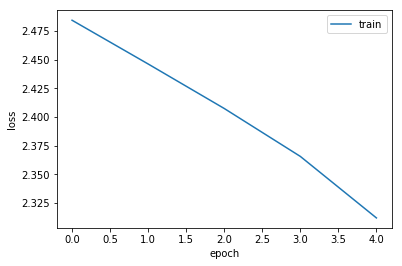

In [11]:
# 6. Visualize training phase
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [12]:
# 7. Evaluate model
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 3ms/step
acc: 34.00%


In [13]:
# 8. Use the model to predict

pred_count = 50

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])
    seq_out.append(codes[idx])
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']
